In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
def func_mae(x1,x2):
    return np.mean(np.abs(x1-x2))

def lasso_cv(X_train,y_train,alp_list,split_n,intercept_boolen,MAX_ITER=10000):
    kf = KFold(n_splits = split_n)
    
    mse_ave = []
    mae_ave = []
    
    for t in alp_list:
        mse = []
        mae = []
        ls = Lasso(alpha = t,fit_intercept = intercept_boolen,max_iter = MAX_ITER)
        
        for k, (train, test) in enumerate(kf.split(X_train)):
            ls.fit(X_train.loc[train],y_train.loc[train])
            predictions = ls.predict(X_train.loc[test])
            mse.append(sm.tools.eval_measures.mse(predictions,y_train.loc[test]))
            mae.append(func_mae(predictions,y_train.loc[test]))
            
        mse_ave.append(np.mean(mse))
        mae_ave.append(np.mean(mae))
    
    df = pd.DataFrame({'alpha':alp_list,'MSE':mse_ave,'MAE':mae_ave})
    a_star = df.sort_values(by='MSE').reset_index().loc[0,'alpha']
    mse_star = df.sort_values(by='MSE').reset_index().loc[0,'MSE']
    
    return [a_star,mse_star]

In [3]:
df = pd.read_pickle('regr_df_new.pkl')
del df['iv']
df2 = pd.read_csv('SSE510050VIX(1).csv',index_col=0)
df2['date'] = df2['tradedate'].apply(pd.to_datetime)
df2 = df2[['date','vix']]
df3 = pd.merge(left=df,right=df2,how='inner',on='date')
df3.head()

,date,cchv10,cchv22,cchv250,cchv44,cchv5,cchv66,gkhv10,gkhv22,gkhv250,...,rshv44,rshv5,rshv66,yzhv10,yzhv22,yzhv250,yzhv44,yzhv5,yzhv66,vix
0,2015-12-01,0.259215,0.279535,0.421753,0.233623,0.358053,0.390261,0.204379,0.240595,0.373034,...,0.229824,0.244163,0.332196,0.214024,0.267942,0.433284,0.270279,0.257701,0.389017,32.826614
1,2015-12-02,0.366014,0.315227,0.423600,0.257679,0.538290,0.394065,0.225499,0.249751,0.373265,...,0.231295,0.259192,0.330025,0.234991,0.273084,0.433438,0.272863,0.296591,0.388105,31.359858
2,2015-12-03,0.360918,0.314335,0.423487,0.257439,0.537456,0.341263,0.237105,0.254178,0.373515,...,0.231586,0.276978,0.327804,0.244212,0.276789,0.433650,0.273368,0.310326,0.379251,31.862687
3,2015-12-04,0.383709,0.298086,0.423778,0.265814,0.418484,0.312630,0.239585,0.250902,0.373581,...,0.230796,0.251610,0.306779,0.248477,0.274844,0.433757,0.274230,0.288362,0.350372,32.419264
4,2015-12-07,0.383769,0.280394,0.423455,0.260403,0.419736,0.311930,0.237847,0.222077,0.373553,...,0.230363,0.202105,0.286753,0.247135,0.246933,0.433665,0.273243,0.252466,0.334571,32.171463


In [4]:
X=df3.iloc[:,1:37]
y=df3.iloc[:,37]
length = int(len(y)*0.3)

In [5]:
X.head()

,cchv10,cchv22,cchv250,cchv44,cchv5,cchv66,gkhv10,gkhv22,gkhv250,gkhv44,...,rshv250,rshv44,rshv5,rshv66,yzhv10,yzhv22,yzhv250,yzhv44,yzhv5,yzhv66
0,0.259215,0.279535,0.421753,0.233623,0.358053,0.390261,0.204379,0.240595,0.373034,0.219368,...,0.377166,0.229824,0.244163,0.332196,0.214024,0.267942,0.433284,0.270279,0.257701,0.389017
1,0.366014,0.315227,0.423600,0.257679,0.538290,0.394065,0.225499,0.249751,0.373265,0.224471,...,0.377064,0.231295,0.259192,0.330025,0.234991,0.273084,0.433438,0.272863,0.296591,0.388105
2,0.360918,0.314335,0.423487,0.257439,0.537456,0.341263,0.237105,0.254178,0.373515,0.225533,...,0.377320,0.231586,0.276978,0.327804,0.244212,0.276789,0.433650,0.273368,0.310326,0.379251
3,0.383709,0.298086,0.423778,0.265814,0.418484,0.312630,0.239585,0.250902,0.373581,0.225541,...,0.377394,0.230796,0.251610,0.306779,0.248477,0.274844,0.433757,0.274230,0.288362,0.350372
4,0.383769,0.280394,0.423455,0.260403,0.419736,0.311930,0.237847,0.222077,0.373553,0.225019,...,0.377377,0.230363,0.202105,0.286753,0.247135,0.246933,0.433665,0.273243,0.252466,0.334571


In [6]:
y.head()

0    32.826614
1    31.359858
2    31.862687
3    32.419264
4    32.171463
Name: vix, dtype: float64

# Rolling

In [7]:
predict_values = []
true_values = []
alp_star = []

for i in range(0,length):
    alp_start = 0.006
    alp_stop =  0.011
    alp = np.linspace(start=alp_start,stop=alp_stop,num=11)
    alp = [round(i,4) for i in alp]
    
    X_train = X.iloc[i:len(y)-length+i,:].reset_index(drop=True)
    y_train = y.iloc[i:len(y)-length+i].reset_index(drop=True)
    a = lasso_cv(X_train,y_train,alp,10,False,10000)[0]
    
    while(a==alp_stop):
        alp_start += 0.005
        alp_stop += 0.005
        alp = np.linspace(start=alp_start,stop=alp_stop,num=11)
        alp = [round(i,4) for i in alp]
        a = lasso_cv(X_train,y_train,alp,10,False,10000)[0]
    
    ls = Lasso(alpha = a,fit_intercept = False,max_iter = 10000)
    ls.fit(X_train,y_train)
    prediction = ls.predict(X.iloc[len(y)-length+i:len(y)-length+i+1])[0]
    true_values.append(y[len(y)-length+i])
    predict_values.append(prediction)
    alp_star.append(a)

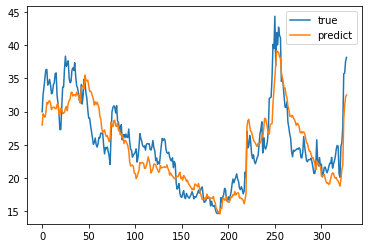

In [8]:
sns.lineplot(np.arange(len(predict_values)),true_values,label='true')
sns.lineplot(np.arange(len(predict_values)),predict_values,label='predict')
plt.legend()

In [19]:
test_date=df3.loc[len(X)-length:,'date']

# Static

In [9]:
X_train=X.iloc[0:len(X)-length,:]
y_train=y[0:len(X)-length]
X_test=X.iloc[len(X)-length:,:].reset_index(drop=True)
y_test=y[len(X)-length:].reset_index(drop=True)

In [10]:
def func_mae(x1,x2):
    return np.mean(np.abs(x1-x2))


kf = KFold(n_splits=10)
alp = np.linspace(start=0.006,stop=0.02,num=40)

mse_ave = []
mae_ave = []

for t in alp:
    mse = []
    mae = []
    ls = Lasso(alpha=t,fit_intercept=False,max_iter=10000)
    for k, (train, test) in enumerate(kf.split(X_train)):
        ls.fit(X_train.loc[train],y_train.loc[train])
        predictions = ls.predict(X_train.loc[test])
        mse.append(sm.tools.eval_measures.mse(predictions,y_train.loc[test]))
        mae.append(func_mae(predictions,y_train.loc[test]))
    mse_ave.append(np.mean(mse))
    mae_ave.append(np.mean(mae))

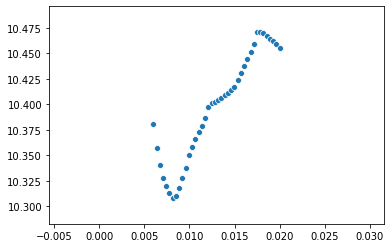

In [11]:
sns.scatterplot(alp,mse_ave)

In [12]:
a_star=pd.DataFrame({'alpha':alp,'mse':mse_ave}).sort_values(by='mse').reset_index().iloc[0,1]
a_star

0.008153846153846154

In [13]:
ls = Lasso(alpha=a_star,fit_intercept=False,max_iter=10000)
ls.fit(X_train,y_train)
coefficient_matrix=pd.DataFrame({'feature':X_train.columns,'coefficient':ls.coef_})
coefficient_matrix[coefficient_matrix.iloc[:,1]!=0].reset_index(drop=True)

,feature,coefficient
0,cchv22,3.296907
1,cchv250,3.913722
2,cchv44,18.953319
3,cchv5,0.874950
4,gkhv10,19.655932
5,gkhv22,11.144272
6,gkhv44,26.261632
7,gkhv5,7.160772
8,gkyzhv5,-2.587251
9,gkyzhv66,21.707756


In [14]:
y_test_predict=ls.predict(X_test)

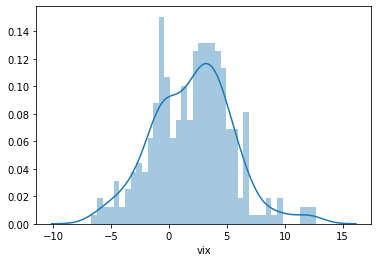

In [15]:
sns.distplot(y_test-y_test_predict,bins=40)

In [16]:
sm.tools.eval_measures.mse(y_test,y_test_predict)

15.910265396474948

In [17]:
sm.tools.eval_measures.mse(y_train,ls.predict(X_train))

6.482071731137561

In [21]:
results = pd.DataFrame({'date':test_date.reset_index(drop=True),'rolling predict':predict_values,
                        'static predict':y_test_predict,'real vix':true_values})
results

,date,rolling predict,static predict,real vix
0,2019-03-01,27.962047,27.919863,29.965378
1,2019-03-04,29.655264,29.635086,32.584331
2,2019-03-05,29.292779,29.366355,33.718041
3,2019-03-06,29.156175,29.193196,35.120822
4,2019-03-07,29.857601,29.556089,36.295277
...,...,...,...,...
323,2020-07-03,21.937558,18.710070,27.789083
324,2020-07-06,28.810273,22.970015,35.705403
325,2020-07-07,30.921841,24.366067,35.787732
326,2020-07-08,32.201464,25.508971,37.600200


In [179]:
results.to_csv('vix.csv')

C:\Users\yangl\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


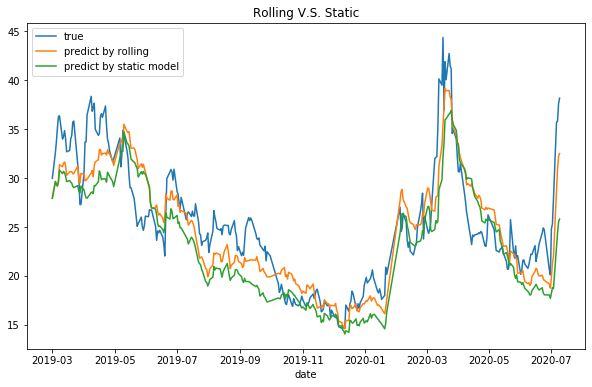

In [20]:
plt.figure(figsize=(10,6))
sns.lineplot(test_date,true_values,label='true')
sns.lineplot(test_date,predict_values,label='predict by rolling')
sns.lineplot(test_date,y_test_predict,label='predict by static model')
plt.title('Rolling V.S. Static')
plt.legend(loc=2)